In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN


In [2]:
df=pd.read_excel('cluster analysis.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52245 entries, 0 to 52244
Data columns (total 18 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Individual LookupID                        52245 non-null  int64  
 1   Age                                        52245 non-null  int64  
 2   Birth Date                                 52245 non-null  int64  
 3   Age Range Category                         52245 non-null  int64  
 4   Age Range                                  52245 non-null  object 
 5   Regional Category Codes                    52245 non-null  int64  
 6   BUSN Volunteer (either type) (Y/N)         52245 non-null  int64  
 7   HH Affinity Total (parent, child, spouse)  52245 non-null  int64  
 8   fy23 Engagement excl $$                    52245 non-null  int64  
 9   fy24 Engagement excl $$                    52245 non-null  int64  
 10  BUSN Affiliation-Emplo

**K-Means Method**

In [24]:
# Select relevant features for clustering
features = [
    "Age Range Category", "Regional Category Codes", "BUSN Volunteer (either type) (Y/N)",
    "HH Affinity Total (parent, child, spouse)", "fy23 Engagement excl $$", "fy24 Engagement excl $$",
    "BUSN Affiliation-Employment", "BUSN Affiliation-Student Involvement",
    "Affiliation- BUSN score minus giving", "UIUC Affiliation minus giving",
    "UIUC Affiliation Employment", "UIUC Affiliation-Student Involvement"
]


In [25]:
X = df[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:

# Determine the optimal number of clusters using the Elbow Method
inertia = []
silhouette_scores = []
k_range = range(2, 11)  # Test k from 2 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)  # Sum of squared distances
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot Elbow Method
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')

plt.show()

In [26]:

# Choose an optimal k (based on elbow and silhouette analysis)
optimal_k = 4  # Adjust based on the graphs

# Fit the K-Means model with the selected number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

         Age Range Category  Regional Category Codes  \
Cluster                                                
0                  5.062371                 1.951160   
1                  3.759635                 2.069980   
2                  2.713529                 2.413895   
3                  3.812003                 2.378311   

         BUSN Volunteer (either type) (Y/N)  \
Cluster                                       
0                                       0.0   
1                                       1.0   
2                                       0.0   
3                                       0.0   

         HH Affinity Total (parent, child, spouse)  fy23 Engagement excl $$  \
Cluster                                                                       
0                                         0.180284                 0.325000   
1                                         0.421907                 1.136917   
2                                         0.437962              

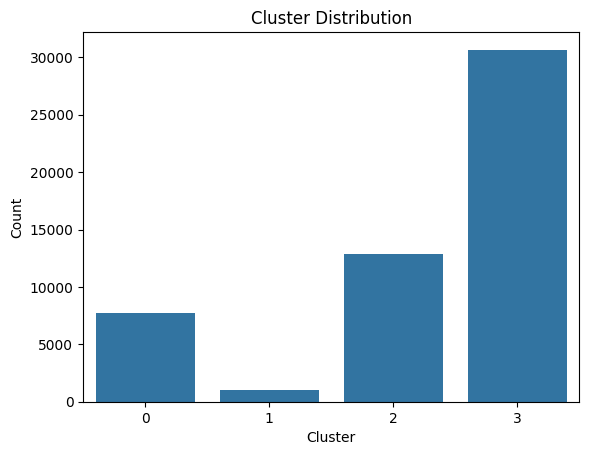

In [27]:
# Analyze cluster characteristics
cluster_means = df.groupby("Cluster")[features].mean()
print(cluster_means)

# Visualize cluster distribution
sns.countplot(x=df["Cluster"])
plt.title("Cluster Distribution")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()


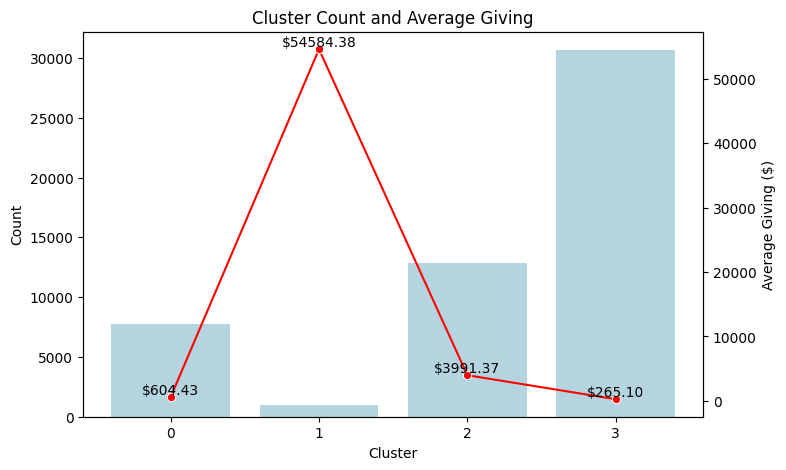

In [28]:
# Compute the mean values for clustering features (excluding donation information)
cluster_means = df.groupby("Cluster")[features].mean()

# Compute the average 'Gies Lifetime Giving as of 1/8/25' for each cluster
giving_means = df.groupby("Cluster")["Gies Lifetime Giving as of 1/8/25"].mean()

# Compute the number of samples in each cluster
cluster_counts = df["Cluster"].value_counts().sort_index()

# Create a new DataFrame to store the count and average giving per cluster
summary_df = pd.DataFrame({"Count": cluster_counts, "Avg Giving": giving_means})

# Create a bar chart for cluster counts and overlay a line plot for average giving
fig, ax1 = plt.subplots(figsize=(8, 5))

# Plot the count of each cluster as a bar chart
sns.barplot(x=summary_df.index, y=summary_df["Count"], color="lightblue", ax=ax1)
ax1.set_ylabel("Count")
ax1.set_xlabel("Cluster")
ax1.set_title("Cluster Count and Average Giving")

# Create a secondary y-axis for average giving and plot it as a line chart
ax2 = ax1.twinx()
sns.lineplot(x=summary_df.index, y=summary_df["Avg Giving"], marker="o", color="red", ax=ax2)
ax2.set_ylabel("Average Giving ($)")

# Annotate each red dot with the corresponding average giving value
for i, txt in enumerate(summary_df["Avg Giving"]):
    ax2.text(i, txt, f"${txt:.2f}", ha="center", va="bottom", fontsize=10, color="black")

plt.show()

K = 5

         Age Range Category  Regional Category Codes  \
Cluster                                                
0                  3.820103                 2.377645   
1                  2.717287                 2.413563   
2                  5.062474                 1.908788   
3                  3.765849                 2.070552   
4                  4.414487                 2.563380   

         BUSN Volunteer (either type) (Y/N)  \
Cluster                                       
0                                  0.000000   
1                                  0.000000   
2                                  0.000000   
3                                  1.000000   
4                                  0.016097   

         HH Affinity Total (parent, child, spouse)  fy23 Engagement excl $$  \
Cluster                                                                       
0                                         0.147443                 0.128911   
1                                       

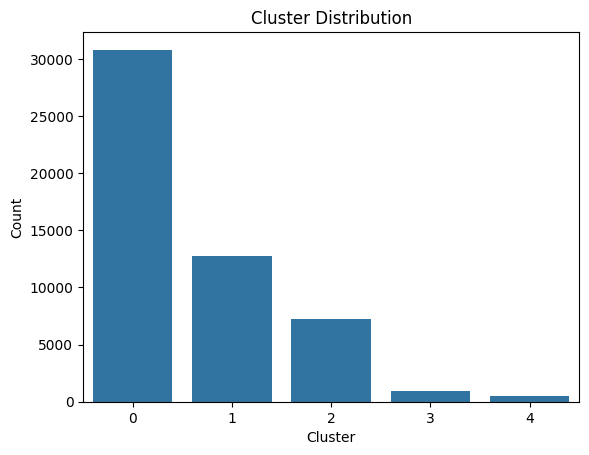

In [29]:
# Choose an optimal k (based on elbow and silhouette analysis)
optimal_k = 5  # Adjust based on the graphs

# Fit the K-Means model with the selected number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# Analyze cluster characteristics
cluster_means = df.groupby("Cluster")[features].mean()
print(cluster_means)

# Visualize cluster distribution
sns.countplot(x=df["Cluster"])
plt.title("Cluster Distribution")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()

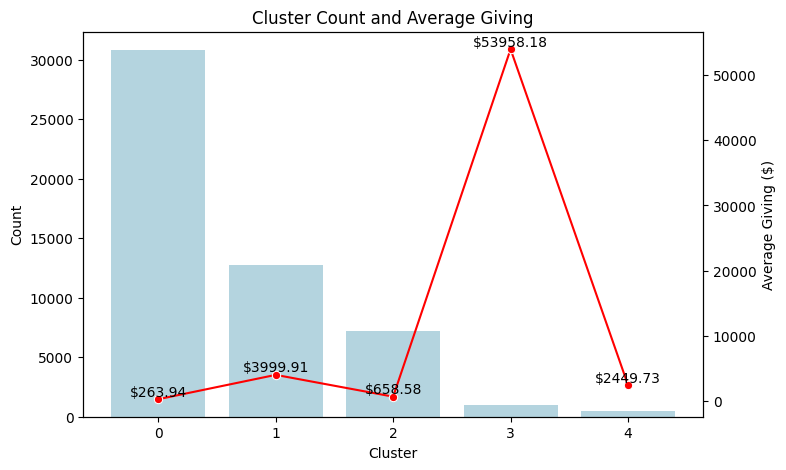

In [30]:
# Compute the mean values for clustering features (excluding donation information)
cluster_means = df.groupby("Cluster")[features].mean()

# Compute the average 'Gies Lifetime Giving as of 1/8/25' for each cluster
giving_means = df.groupby("Cluster")["Gies Lifetime Giving as of 1/8/25"].mean()

# Compute the number of samples in each cluster
cluster_counts = df["Cluster"].value_counts().sort_index()

# Create a new DataFrame to store the count and average giving per cluster
summary_df = pd.DataFrame({"Count": cluster_counts, "Avg Giving": giving_means})

# Create a bar chart for cluster counts and overlay a line plot for average giving
fig, ax1 = plt.subplots(figsize=(8, 5))

# Plot the count of each cluster as a bar chart
sns.barplot(x=summary_df.index, y=summary_df["Count"], color="lightblue", ax=ax1)
ax1.set_ylabel("Count")
ax1.set_xlabel("Cluster")
ax1.set_title("Cluster Count and Average Giving")

# Create a secondary y-axis for average giving and plot it as a line chart
ax2 = ax1.twinx()
sns.lineplot(x=summary_df.index, y=summary_df["Avg Giving"], marker="o", color="red", ax=ax2)
ax2.set_ylabel("Average Giving ($)")

# Annotate each red dot with the corresponding average giving value
for i, txt in enumerate(summary_df["Avg Giving"]):
    ax2.text(i, txt, f"${txt:.2f}", ha="center", va="bottom", fontsize=10, color="black")

plt.show()

**K-Means Method (Except Age and Region)**

In [31]:
# Select relevant features for clustering
features2 = [
    "BUSN Volunteer (either type) (Y/N)",
    "HH Affinity Total (parent, child, spouse)", "fy23 Engagement excl $$", "fy24 Engagement excl $$",
    "BUSN Affiliation-Employment", "BUSN Affiliation-Student Involvement",
    "Affiliation- BUSN score minus giving", "UIUC Affiliation minus giving",
    "UIUC Affiliation Employment", "UIUC Affiliation-Student Involvement"
]


In [32]:
X = df[features2]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

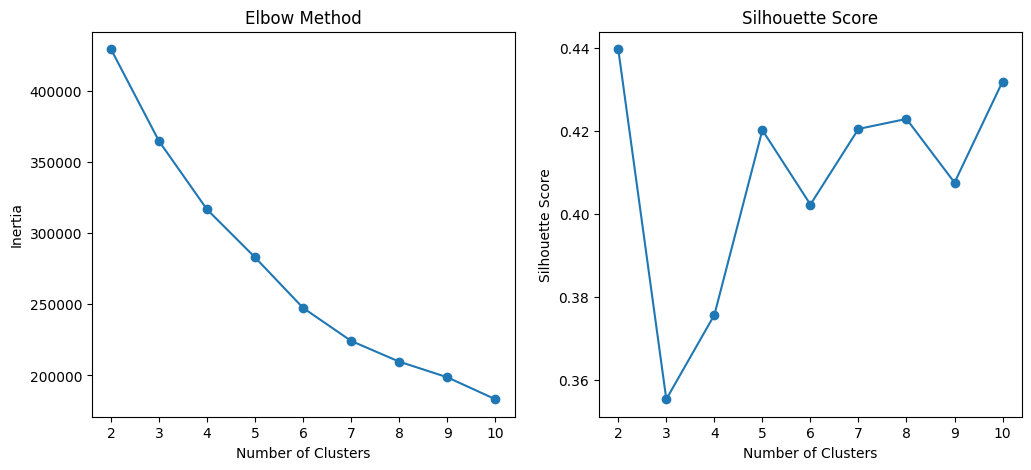

In [16]:
# Determine the optimal number of clusters using the Elbow Method
inertia = []
silhouette_scores = []
k_range = range(2, 11)  # Test k from 2 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)  # Sum of squared distances
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot Elbow Method
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')

plt.show()

         BUSN Volunteer (either type) (Y/N)  \
Cluster                                       
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       1.0   

         HH Affinity Total (parent, child, spouse)  fy23 Engagement excl $$  \
Cluster                                                                       
0                                         0.386537                 1.273997   
1                                         0.158228                 0.096399   
2                                         0.203366                 0.350671   
3                                         0.421907                 1.136917   

         fy24 Engagement excl $$  BUSN Affiliation-Employment  \
Cluster                                                         
0                       1.234464                     1.189684   
1                       0.089861               

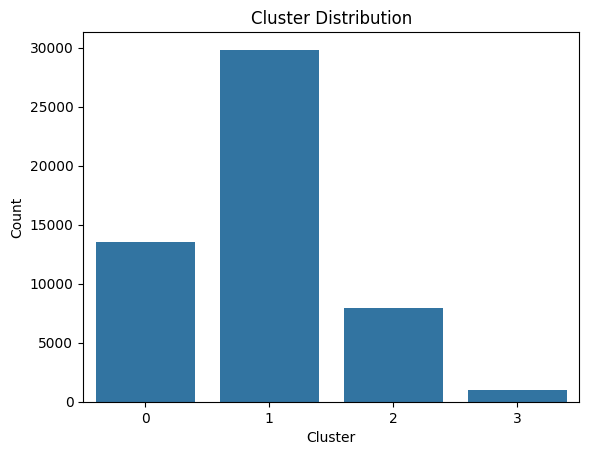

In [33]:
# Choose an optimal k (based on elbow and silhouette analysis)
optimal_k = 4  # Adjust based on the graphs

# Fit the K-Means model with the selected number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# Analyze cluster characteristics
cluster_means = df.groupby("Cluster")[features2].mean()
print(cluster_means)

# Visualize cluster distribution
sns.countplot(x=df["Cluster"])
plt.title("Cluster Distribution")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()

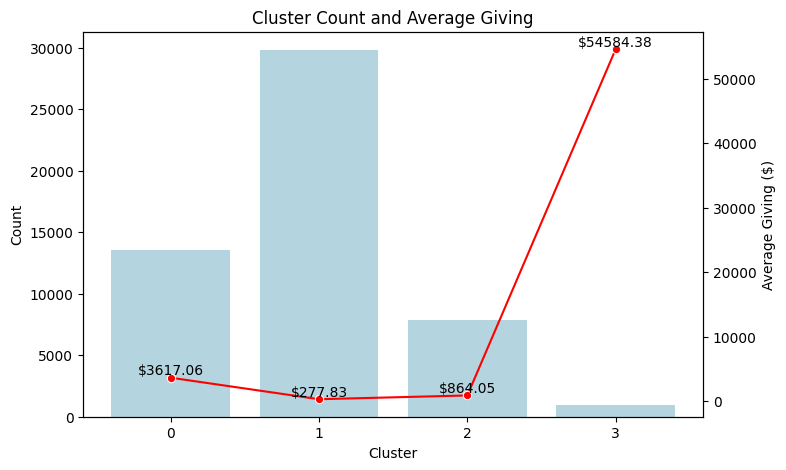

In [34]:
# Compute the mean values for clustering features (excluding donation information)
cluster_means = df.groupby("Cluster")[features2].mean()

# Compute the average 'Gies Lifetime Giving as of 1/8/25' for each cluster
giving_means = df.groupby("Cluster")["Gies Lifetime Giving as of 1/8/25"].mean()

# Compute the number of samples in each cluster
cluster_counts = df["Cluster"].value_counts().sort_index()

# Create a new DataFrame to store the count and average giving per cluster
summary_df = pd.DataFrame({"Count": cluster_counts, "Avg Giving": giving_means})

# Create a bar chart for cluster counts and overlay a line plot for average giving
fig, ax1 = plt.subplots(figsize=(8, 5))

# Plot the count of each cluster as a bar chart
sns.barplot(x=summary_df.index, y=summary_df["Count"], color="lightblue", ax=ax1)
ax1.set_ylabel("Count")
ax1.set_xlabel("Cluster")
ax1.set_title("Cluster Count and Average Giving")

# Create a secondary y-axis for average giving and plot it as a line chart
ax2 = ax1.twinx()
sns.lineplot(x=summary_df.index, y=summary_df["Avg Giving"], marker="o", color="red", ax=ax2)
ax2.set_ylabel("Average Giving ($)")

# Annotate each red dot with the corresponding average giving value
for i, txt in enumerate(summary_df["Avg Giving"]):
    ax2.text(i, txt, f"${txt:.2f}", ha="center", va="bottom", fontsize=10, color="black")

plt.show()

K = 5

         Age Range Category  Regional Category Codes  \
Cluster                                                
0                  4.983007                 1.934220   
1                  3.697743                 2.399489   
2                  2.777556                 2.330222   
3                  4.406439                 2.547284   
4                  3.767656                 2.068577   

         BUSN Volunteer (either type) (Y/N)  \
Cluster                                       
0                                  0.000000   
1                                  0.000000   
2                                  0.000000   
3                                  0.018109   
4                                  1.000000   

         HH Affinity Total (parent, child, spouse)  fy23 Engagement excl $$  \
Cluster                                                                       
0                                         0.198849                 0.332877   
1                                       

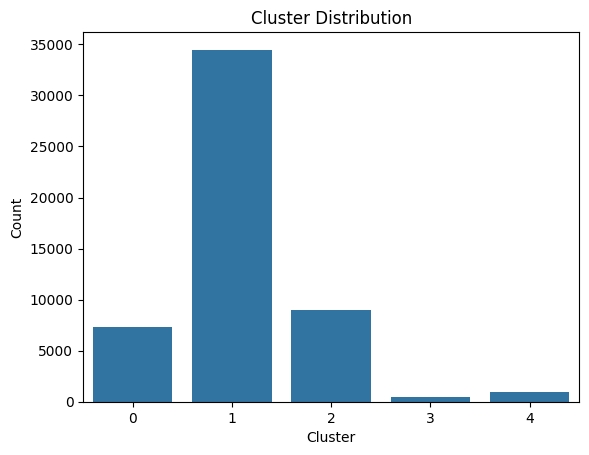

In [35]:
# Choose an optimal k (based on elbow and silhouette analysis)
optimal_k = 5  # Adjust based on the graphs

# Fit the K-Means model with the selected number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# Analyze cluster characteristics
cluster_means = df.groupby("Cluster")[features].mean()
print(cluster_means)

# Visualize cluster distribution
sns.countplot(x=df["Cluster"])
plt.title("Cluster Distribution")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()

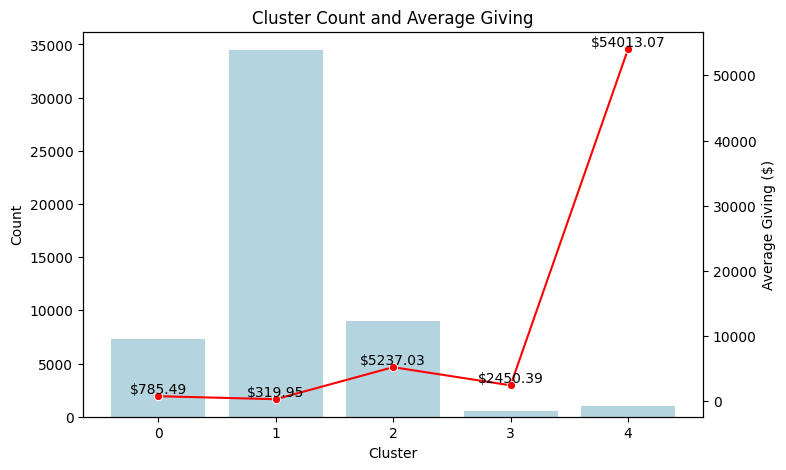

In [36]:
# Compute the mean values for clustering features (excluding donation information)
cluster_means = df.groupby("Cluster")[features2].mean()

# Compute the average 'Gies Lifetime Giving as of 1/8/25' for each cluster
giving_means = df.groupby("Cluster")["Gies Lifetime Giving as of 1/8/25"].mean()

# Compute the number of samples in each cluster
cluster_counts = df["Cluster"].value_counts().sort_index()

# Create a new DataFrame to store the count and average giving per cluster
summary_df = pd.DataFrame({"Count": cluster_counts, "Avg Giving": giving_means})

# Create a bar chart for cluster counts and overlay a line plot for average giving
fig, ax1 = plt.subplots(figsize=(8, 5))

# Plot the count of each cluster as a bar chart
sns.barplot(x=summary_df.index, y=summary_df["Count"], color="lightblue", ax=ax1)
ax1.set_ylabel("Count")
ax1.set_xlabel("Cluster")
ax1.set_title("Cluster Count and Average Giving")

# Create a secondary y-axis for average giving and plot it as a line chart
ax2 = ax1.twinx()
sns.lineplot(x=summary_df.index, y=summary_df["Avg Giving"], marker="o", color="red", ax=ax2)
ax2.set_ylabel("Average Giving ($)")

# Annotate each red dot with the corresponding average giving value
for i, txt in enumerate(summary_df["Avg Giving"]):
    ax2.text(i, txt, f"${txt:.2f}", ha="center", va="bottom", fontsize=10, color="black")

plt.show()

**DBSCAN (Density-Based Clustering)**

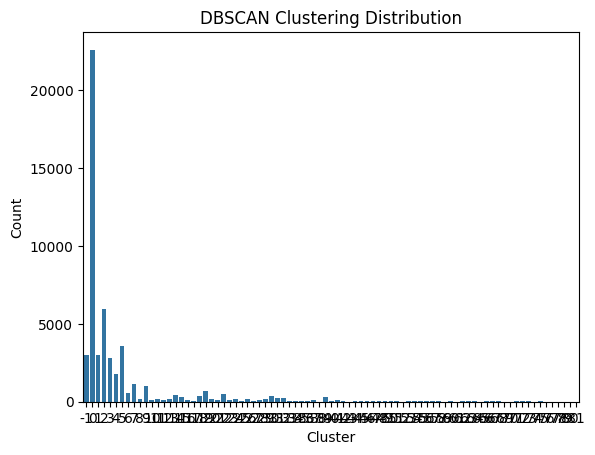

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=1.5, min_samples=10, n_jobs=-1)  # Adjust parameters for optimal results
df["Cluster_DBSCAN"] = dbscan.fit_predict(X_scaled)

# Visualize cluster distribution
sns.countplot(x=df["Cluster_DBSCAN"])
plt.title("DBSCAN Clustering Distribution")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()


Since density-based clustering does not allow for prior control over the number of clusters, it instead aggregates all the clusters based on the density of the data points. From the plot, the first column labeled as -1 represents all the outliers, not a cluster. The clusters start from the second column, which is the 0th cluster.

We can see that the first 6-7 clusters are more prominent. We will extract these and examine the specific feature values.

Cluster Characteristics (Mean of features for clusters 0-6):
                Age Range Category  Regional Category Codes  \
Cluster_DBSCAN                                                
0                         3.966248                 2.337831   
1                         4.368527                 2.342972   
2                         3.591466                 2.433563   
3                         4.510631                 2.348335   
4                         2.828962                 2.307868   
5                         3.451308                 2.180022   
6                         2.330896                 2.323583   

                BUSN Volunteer (either type) (Y/N)  \
Cluster_DBSCAN                                       
0                                              0.0   
1                                              0.0   
2                                              0.0   
3                                              0.0   
4                                              

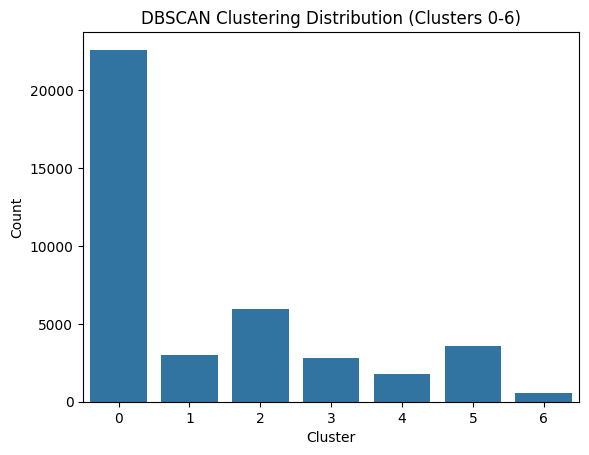

In [38]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=1.5, min_samples=10, n_jobs=-1)  # Adjust parameters for optimal results
df["Cluster_DBSCAN"] = dbscan.fit_predict(X_scaled)

# Filter out outliers (-1) and focus on the first 7 clusters
df_filtered = df[df["Cluster_DBSCAN"] >= 0]  # Exclude outliers (labelled as -1)
df_filtered = df_filtered[df_filtered["Cluster_DBSCAN"] < 7]  # Only keep clusters 0 to 6

# Calculate and display cluster characteristics (mean of features for clusters 0-6)
cluster_means = df_filtered.groupby("Cluster_DBSCAN")[features].mean()

# Print the means of the features for clusters 0-6
print("Cluster Characteristics (Mean of features for clusters 0-6):")
print(cluster_means)

# Visualize the distribution of clusters 0-6
sns.countplot(x=df_filtered["Cluster_DBSCAN"])
plt.title("DBSCAN Clustering Distribution (Clusters 0-6)")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()


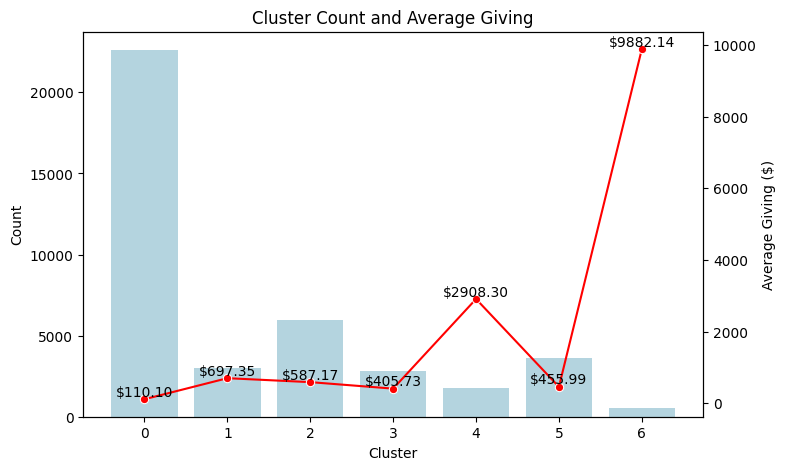

In [39]:
# Compute the average 'Gies Lifetime Giving as of 1/8/25' for each cluster
giving_means = df_filtered.groupby("Cluster_DBSCAN")["Gies Lifetime Giving as of 1/8/25"].mean()

# Compute the number of samples in each cluster
cluster_counts = df_filtered["Cluster_DBSCAN"].value_counts().sort_index()

# Create a new DataFrame to store the count and average giving per cluster
summary_df = pd.DataFrame({"Count": cluster_counts, "Avg Giving": giving_means})

# Create a bar chart for cluster counts and overlay a line plot for average giving
fig, ax1 = plt.subplots(figsize=(8, 5))

# Plot the count of each cluster as a bar chart
sns.barplot(x=summary_df.index, y=summary_df["Count"], color="lightblue", ax=ax1)
ax1.set_ylabel("Count")
ax1.set_xlabel("Cluster")
ax1.set_title("Cluster Count and Average Giving")

# Create a secondary y-axis for average giving and plot it as a line chart
ax2 = ax1.twinx()
sns.lineplot(x=summary_df.index, y=summary_df["Avg Giving"], marker="o", color="red", ax=ax2)
ax2.set_ylabel("Average Giving ($)")

# Annotate each red dot with the corresponding average giving value
for i, txt in enumerate(summary_df["Avg Giving"]):
    ax2.text(i, txt, f"${txt:.2f}", ha="center", va="bottom", fontsize=10, color="black")

plt.show()

**Hierarchical Clustering**

It can not be used and run in this enviroment as the data set is too big and the method is complicated that it is time out.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

# Perform Agglomerative Clustering with 4 clusters
agg_clustering = AgglomerativeClustering(n_clusters=4, linkage='ward')
df["Cluster_Hierarchical"] = agg_clustering.fit_predict(X_scaled)

# Visualize cluster distribution
sns.countplot(x=df["Cluster_Hierarchical"])
plt.title("Hierarchical Clustering Distribution")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()
